Imports

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Build the dataset

This is a nonlinear AND long-distance dataset

(Actually, we will test long-distance vs. short-distance patterns)

Start it with a small T and increase it later

In [16]:
T = 30
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for _ in range(5000):
  x = np.random.randn(T)
  X.append(x)
  #y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

# Try a linear model first
Note: it is classification now!

In [3]:
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [4]:
r = model.fit(X, Y, validation_split=0.5, epochs=100)

Epoch 1/100
79/79 [==============================] - 6s 14ms/step - loss: 0.7597 - accuracy: 0.5116 - val_loss: 0.7046 - val_accuracy: 0.4920
Epoch 2/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6964 - accuracy: 0.5068 - val_loss: 0.6989 - val_accuracy: 0.4992
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6957 - accuracy: 0.5280 - val_loss: 0.6971 - val_accuracy: 0.4960
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5168 - val_loss: 0.6981 - val_accuracy: 0.5044
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5044 - val_loss: 0.6982 - val_accuracy: 0.5060
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6961 - accuracy: 0.5256 - val_loss: 0.6971 - val_accuracy: 0.5084
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5144 - val_loss: 0.6954 - val_accuracy: 0.5172
Epoch 8/100

KeyboardInterrupt: ignored

Plot loss per iteration

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Plot the accuracy too - should be around 50%

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

# Now try an LSTM


In [17]:
inputs = np.expand_dims(X, -1)

Make the RNN

In [18]:
i = Input(shape=(T, D))

# method 1
# x = SimpleRNN(5)(i)
# x = LSTM(5)(i)
# x = GRU(5)(i)

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

Train the RNN

In [19]:
r = model.fit(
    inputs, Y,
    validation_split=0.5,
    epochs=100
)

Epoch 1/100
79/79 [==============================] - 5s 28ms/step - loss: 0.6957 - accuracy: 0.4900 - val_loss: 0.6930 - val_accuracy: 0.5120
Epoch 2/100
79/79 [==============================] - 2s 20ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5120
Epoch 3/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6934 - accuracy: 0.5076 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 4/100
79/79 [==============================] - 2s 22ms/step - loss: 0.6930 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5132
Epoch 5/100
79/79 [==============================] - 2s 20ms/step - loss: 0.6930 - accuracy: 0.5128 - val_loss: 0.6935 - val_accuracy: 0.4904
Epoch 6/100
79/79 [==============================] - 2s 24ms/step - loss: 0.6929 - accuracy: 0.5140 - val_loss: 0.6930 - val_accuracy: 0.5112
Epoch 7/100
79/79 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5120
Epoch 

Plot loss per iteration

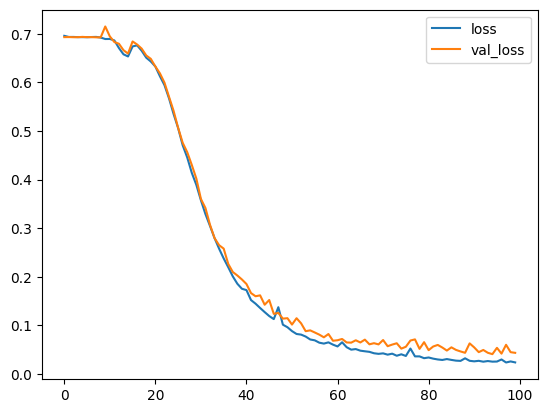

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Plot accuracy per iteration

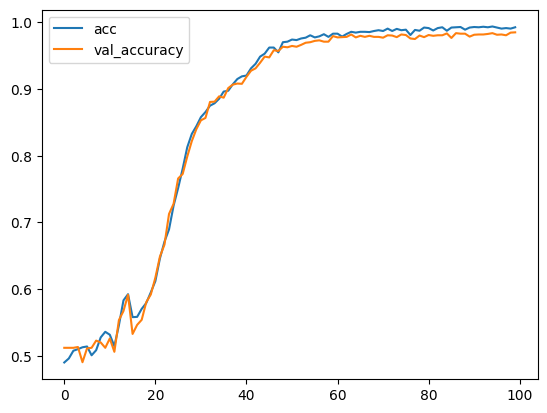

In [21]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();